# Quickstart in 5 minutes

In order to run your first Deepchecks Suite, all you need is:
- A dataframe
- (optional) A model that supports the scikit-learn API

The Deepchecks logic requires 5 lines of code, and starts here: [Define a Deepchecks Dataset](#Define-a-Dataset-Object).

This notebook is built to be self-sufficient, so the first part only loads the iris dataset from scikit-learn and trains a simplistic model

## General Imports

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# filter sklearn warning about all same label when playing with dataset structure
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning) 

## Load Data, Split Train-Val, and Train a simple Model

For the purpose of this example we'll use the simple iris dataset and train a random forest model for multiclass classification

In [3]:
# load data
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [4]:
# train model
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define a Dataset Object

In [5]:
from deepchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. date column, index column).

In [6]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred
# If the dataset has categorical features, the best practice is to pass a list with their names

ds_train = Dataset(df_train, label=label_col, cat_features=[], use_index=False, date=None)
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

## Run Overall Check Suite

Use the overall suite that is a collection of (most of) the prebuilt checks:

In [7]:
from deepchecks.suites import overall_suite

In [8]:
suite = overall_suite()

Overall Suite:   0%|          | 0/33 [00:00<?, ? Check/s]

Overall Suite 
 The suite is composed of various checks such as: Train Test Drift, Trust Score Comparison, Index Train Test Leakage, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✖,Single Feature Contribution - Train Dataset,Features' Predictive Power Score (PPS) is not greater than 0.8,"Features with PPS above threshold: petal width (cm), petal length (cm)"
✖,Single Feature Contribution - Test Dataset,Features' Predictive Power Score (PPS) is not greater than 0.8,"Features with PPS above threshold: petal length (cm), petal width (cm)"
✓,Train Test Drift,PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively,
✓,String Mismatch - Train Dataset,No string variants for all columns,
✓,String Mismatch - Test Dataset,No string variants for all columns,
✓,Data Duplicates - Train Dataset,Duplicate data is not greater than 0%,
✓,Data Duplicates - Test Dataset,Duplicate data is not greater than 0%,
✓,Rare Format Detection - Train Dataset,Rare formats ratio is not greater than 0,
✓,Rare Format Detection - Test Dataset,Rare formats ratio is not greater than 0,
✓,String Length Out Of Bounds - Train Dataset,Ratio of outliers not greater than 0% string length outliers for all columns,


Additional Outputs

Train Test Drift

Calculate drift between train dataset and test dataset.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the features, sorted by
 feature importance and showing only the top 5 features, according to feature importance.
 If available, the plot titles also show the feature importance (FI) rank.

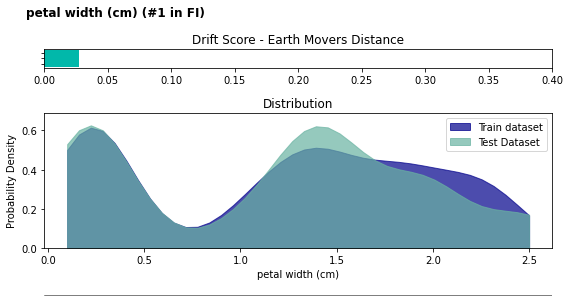

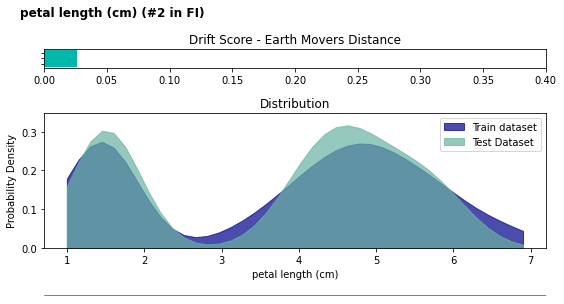

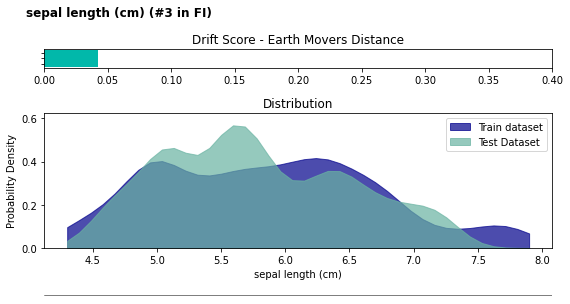

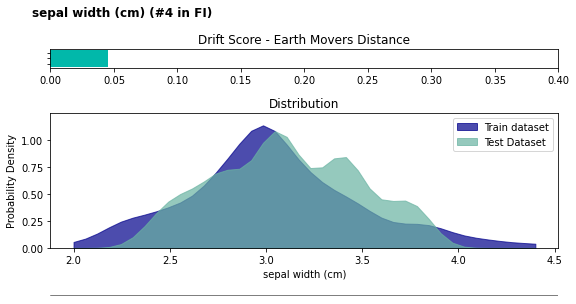

Train Test Samples Mix

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Test indices: 142,5.80,2.70,5.10,1.90,2
Train indices: 101,5.80,2.70,5.10,1.90,2


Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

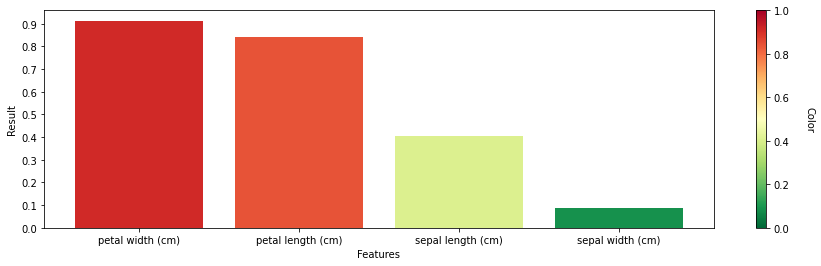

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Test Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

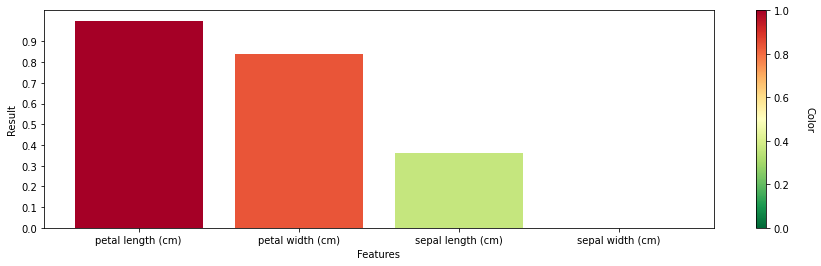

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

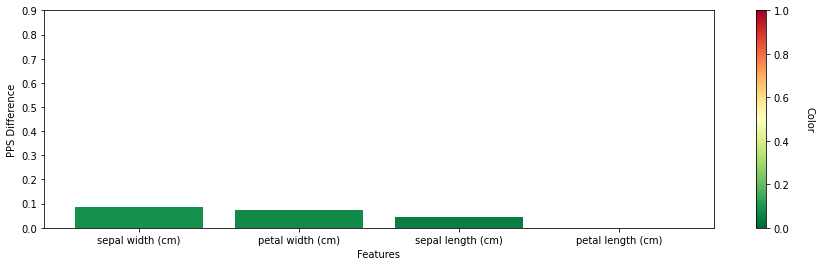

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

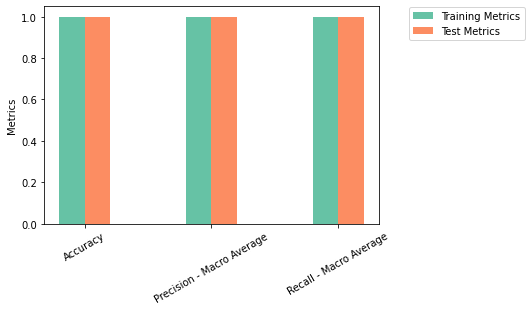

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

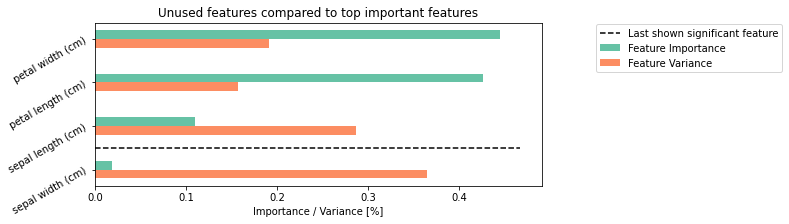

Model Inference Time Check - Train Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 9.57e-05

Model Inference Time Check - Test Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 0.00026445

Datasets Size Comparison

Verify Test dataset size comparing it to the Train dataset size.

,train,test
size,112,38


Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 2.92 times compared to the simple model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 1 compared to Simple constant prediction which achieved a score of 0.34 on tested data.

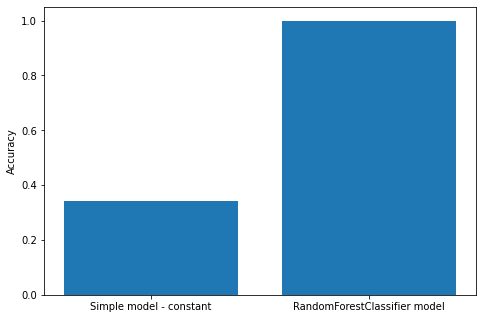

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

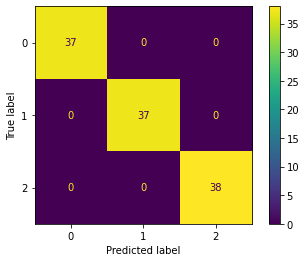

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

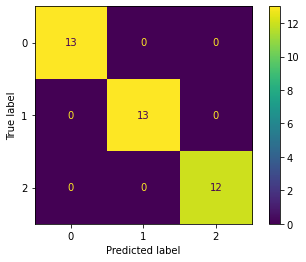

ROC Report - Train Dataset

Calculate the AUC (Area Under Curve) for each class.

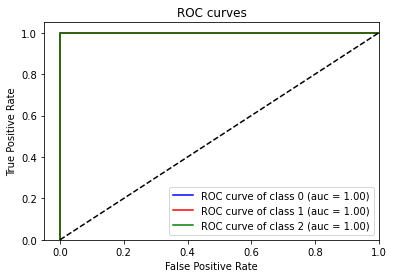

ROC Report - Test Dataset

Calculate the AUC (Area Under Curve) for each class.

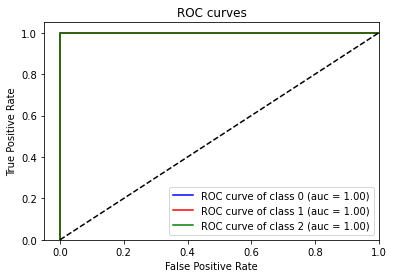

Calibration Metric - Train Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

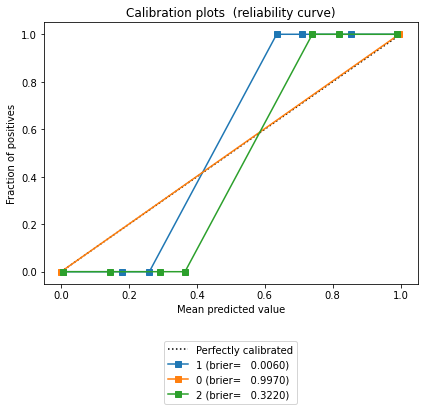

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Calibration Metric - Test Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

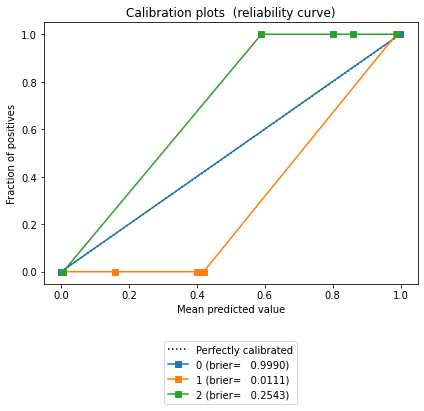

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Class Performance Imbalance - Train Dataset

Visualize class imbalance by displaying the difference between class score values.

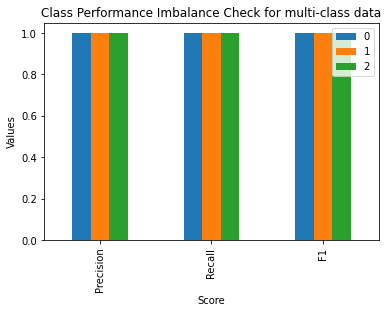

Class Performance Imbalance - Test Dataset

Visualize class imbalance by displaying the difference between class score values.

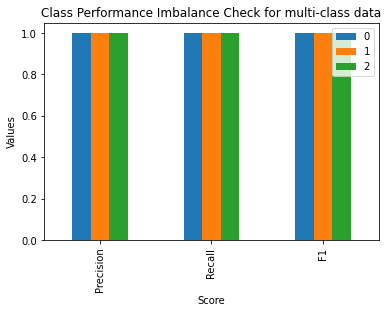

Check,Reason
Trust Score Comparison,"DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter ""min_test_samples"""
Index Train Test Leakage,DeepchecksValueError: Check IndexTrainTestLeakage requires dataset to have an index column
Date Train Test Leakage Duplicates,DeepchecksValueError: Check DateTrainTestLeakageDuplicates requires dataset to have a date column
Date Train Test Leakage Overlap,DeepchecksValueError: Check DateTrainTestLeakageOverlap requires dataset to have a date column
Boosting Overfit,DeepchecksValueError: Unsupported model of type: RandomForestClassifier
Trust Score Comparison,"DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter ""min_test_samples"""
Category Mismatch Train Test,Nothing found
String Mismatch Comparison,Nothing found
Label Ambiguity - Test Dataset,Nothing found
Label Ambiguity - Train Dataset,Nothing found


In [9]:
# set check_datasets_policy to 'both' so that for single dataset checks (e.g. some of the integrity checks),
# so that both test and train will be checked. Default is 'test', running the single dataset checks only on it.

# along with the training and test datasets we should supply a scikit-learn api model type
# if we want many of the checks to be able to run

suite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf, check_datasets_policy='both')

We can see that the single feature contribution failed, both for test and for train. Since this is a very simple dataset and this behavior is not necessarily problematic, we will remove the existing conditions for the PPS

In [10]:
# Lets first print the suite to find the conditions that we want to change:
suite

Overall Suite: [
	0: TrainTestDrift(run=<function TrainTestDrift.run at 0x7fb31027de50>, max_num_categories=10, sort_feature_by=feature importance, n_top_columns=5)
		Conditions:
			0: PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively
	1: TrustScoreComparison(run=<function TrustScoreComparison.run at 0x7fb31027df70>, k_filter=10, alpha=0.001, max_number_categories=10, min_test_samples=300, sample_size=10000, random_state=42, n_to_show=5, percent_top_scores_to_hide=0.01)
		Conditions:
			0: Mean trust score decline is not greater than 20.00%
	2: IndexTrainTestLeakage(run=<function IndexTrainTestLeakage.run at 0x7fb310286160>, n_index_to_show=5)
		Conditions:
			0: Index leakage is not greater than 0%
	3: DateTrainTestLeakageDuplicates(run=<function DateTrainTestLeakageDuplicates.run at 0x7fb310286310>, n_to_show=5)
		Conditions:
			0: Date leakage ratio is not greater than 0%
	4: DateTrainTestLeakageOverlap(run=<function DateTrainTestLeakageOverlap.run at 0x

In [11]:
suite[6].remove_condition(0)

In [12]:
# print and see that the condition was removed
suite[6]

SingleFeatureContribution(run=<function SingleFeatureContribution.run at 0x7fb310286790>, n_show_top=5)

Now we can run the suite again and all checks with conditions will pass.

*Note: the Single Feature Contribution Check will still run as part of the Suite, however it won't appear in the Conditions Summary since it no longer has any conditions defined on it. You can still see its display results in the Additional Outputs section*